In [2]:
import numpy as np
from hamiltonian import *
from reconstruct_lcu import *
from continuers import *
from qsearch_bundle_circuit import *
import pickle

In [3]:
# Lets plot LCU plot
J = -1
N = 2
Bzmax = 2
Bzmin = 0
Bx=0.1
Bzlist_training13=[0.1,1.3]

filename_lcu_exact = "Exact_BzvsE_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"

filenameed_13="ed_BzvsE_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+".dat"
filenameqsim_13="ibmqsim_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+".dat"
filenamebogota_13="bogota_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+".dat"
filenamemanila_13="manila_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+".dat"
filenamemontreal_13="montreal_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+".dat"
filenametrain_13="training"+str(Bzlist_training13)+"BzvsE_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"

Bzlist_training19=[0.1,1.9]

filenameed_19="ed_BzvsE_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+".dat"
filenameqsim_19="ibmqsim_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+".dat"
filenamebogota_19="bogota_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+".dat"
filenamemanila_19="manila_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+".dat"
filenamemontreal_19="montreal_BzvsEm_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+".dat"
filenametrain_19="training"+str(Bzlist_training19)+"BzvsE_LCUN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"


In [4]:
def read_plotdata_lcu_exactenergy(filename,ncol=5):
    filename = "paper_figures/plot_data/" +filename
    cols = tuple(range(0,ncol))
        
    data = np.genfromtxt(filename, usecols=cols)
    data = data.T
    # print(data)
    Bzlist = data[0]
    eval_stor = np.zeros([len(Bzlist),ncol-1])
    for i in range(ncol-1):
        eval_stor[:,i] = data[i+1]
    
    return Bzlist,eval_stor

def read_plotdata_lcu_ed(filename,ncol=3):
    filename = "paper_figures/plot_data/" +filename
    cols = tuple(range(0,ncol))
        
    data = np.genfromtxt(filename, usecols=cols)
    data = data.T
    # print(data)
    Bzlist = data[0]
    eval_stor = np.zeros([len(Bzlist),ncol-1])
    for i in range(ncol-1):
        eval_stor[:,i] = data[i+1]
      
    return Bzlist,eval_stor

def read_plotdata_lcu_mach(filename,ncol=3):
    filename = "paper_figures/plot_data/" +filename
    cols = tuple(range(0,ncol))
        
    data = np.genfromtxt(filename, usecols=cols)
    data = data.T
    # print(data)
    Bzlist = data[0]
    evals = data[1]
    mag = data[2]
      
    return Bzlist,evals,mag

def read_plotdata_lcu_train(filename,ncol=2):
    filename = "paper_figures/plot_data/" +filename
    cols = tuple(range(0,ncol))
        
    data = np.genfromtxt(filename, usecols=cols)
    data = data.T
    # print(data)
    Bzlist = data[0]
    evals = data[1]
    
      
    return Bzlist,evals

In [5]:
# def plotLCUfigure(N=2):
# #     Bzlist,eval_stor = read_plotdata_lcu_exactenergy(filename = filename_lcu_exact_13,ncol=5)
# #     Bzlist_ed,eval_ed = read_plotdata_lcu_ed(filename = filenameed_13,ncol=3)
# #     Bzlist_qsim,eval_qsim,mag_qsim = read_plotdata_lcu_mach(filename = filenameqsim_13,ncol=3)
# #     Bzlist_bogota,eval_bogota,mag_bogota = read_plotdata_lcu_mach(filename = filenamebogota_13,ncol=3)
# #     Bzlist_montreal,eval_montreal,mag_montreal = read_plotdata_lcu_mach(filename = filenamemontreal_13,ncol=3)
# #     # Bzlist_manila,eval_manila,mag_manila = read_plotdata_lcu_mach(filename = filenamemanila_13,ncol=3)
# #     Bzlist_tr,eval_tr = read_plotdata_lcu_train(filename=filenametrain_13,ncol=2)
    
# #     fig,ax = plt.subplots()
# #     for j in range(2**N):
# #         ax.plot(Bzlist,eval_stor[:,j],'k-') 
# #     # for j in range(2):
# #         # ax.plot(Bzlist_ed,eval_ed[:,j],'*',color='r') 
# #     ax.plot(Bzlist_qsim,eval_qsim,'o',color = "g",label="simulator")
# #     ax.plot(Bzlist_bogota,eval_bogota,'s',color = "b",label="bogota")
# #     ax.plot(Bzlist_montreal,eval_montreal,'^',color = "orange",label="montreal")
# #     ax.plot(Bzlist_tr,eval_tr,'|',color = "brown",markersize = 20,lw=4,label = "training points")
# #     # ax.plot(Bzlist_manila,eval_manila,'s',color = "g",)
# #     ax.legend(loc=1,fontsize=12)
# #     ax.set_xlim(0,2)
# #     ax.set_xlabel(r"$B_z$")
# #     ax.set_ylabel(r"$Energy$")
    
#     Bzlist,eval_stor = read_plotdata_lcu_exactenergy(filename = filename_lcu_exact,ncol=5)
#     Bzlist_ed13,eval_ed13 = read_plotdata_lcu_ed(filename = filenameed_13,ncol=3)
#     Bzlist_qsim13,eval_qsim13,mag_qsim13 = read_plotdata_lcu_mach(filename = filenameqsim_13,ncol=3)
#     Bzlist_bogota13,eval_bogota13,mag_bogota13 = read_plotdata_lcu_mach(filename = filenamebogota_13,ncol=3)
#     Bzlist_montreal13,eval_montreal13,mag_montreal13 = read_plotdata_lcu_mach(filename = filenamemontreal_13,ncol=3)
#     # Bzlist_manila,eval_manila,mag_manila = read_plotdata_lcu_mach(filename = filenamemanila_13,ncol=3)
#     Bzlist_tr13,eval_tr13 = read_plotdata_lcu_train(filename=filenametrain_13,ncol=2)
    
#     Bzlist_ed19,eval_ed19 = read_plotdata_lcu_ed(filename = filenameed_19,ncol=3)
#     Bzlist_qsim19,eval_qsim19,mag_qsim19 = read_plotdata_lcu_mach(filename = filenameqsim_19,ncol=3)
#     # Bzlist_bogota19,eval_bogota19,mag_bogota19 = read_plotdata_lcu_mach(filename = filenamebogota_19,ncol=3)
#     Bzlist_montreal19,eval_montreal19,mag_montreal19 = read_plotdata_lcu_mach(filename = filenamemontreal_19,ncol=3)
#     Bzlist_manila19,eval_manila19,mag_manila19 = read_plotdata_lcu_mach(filename = filenamemanila_19,ncol=3)
#     Bzlist_tr19,eval_tr19 = read_plotdata_lcu_train(filename=filenametrain_19,ncol=2)
    
#     clrlst = ["k","grey","grey","grey"]
#     fig,ax = plt.subplots(figsize=(6,5*2),nrows =2,sharex=False)
#      # fig,ax = plt.subplots(figsize=(8,6*2),nrows =2,sharex=False)
#     ax[0].axvspan(0, 1, facecolor='#FFFFF0')
#     ax[0].axvspan(1, 2, facecolor='#F5F5DC')
#     ax[1].axvspan(0, 1, facecolor='#FFFFF0')
#     ax[1].axvspan(1, 2, facecolor='#F5F5DC')
    
#     ax[0].set_ylim(-4,0)
#     ax[1].set_ylim(-4,0)
    
#     for j in range(2**N):
#         ax[0].plot(Bzlist,eval_stor[:,j],color = clrlst[j]) 
#         ax[1].plot(Bzlist,eval_stor[:,j],color = clrlst[j]) 
#     # for j in range(2):
#         # ax.plot(Bzlist_ed,eval_ed[:,j],'*',color='r') 
#     # clrs=["#800000", ]
#     ax[0].plot(Bzlist_qsim13,eval_qsim13,'o',color = "g",label="simulator")
#     ax[0].plot(Bzlist_montreal13,eval_montreal13,'X',color = "#800080",label="montreal")
#     ax[0].plot(Bzlist_bogota13,eval_bogota13,'^',color = "#380282",label="bogota")    
#     # ax[0].plot(Bzlist_tr13,eval_tr13,'2',color = "r",markersize = 10,label = "training points")
#     # ax[0].plot(Bzlist_tr13,eval_tr13,'o',color = "r",markersize = 10,fillstyle="none")
#     ax[0].plot(Bzlist_tr13,eval_tr13,'s',color = "r",fillstyle = "left",markersize = 10,label = "training points")
#     # ax.plot(Bzlist_manila,eval_manila,'s',color = "g",)
#     ax[0].legend(loc=1,fontsize=12)
#     ymin13, ymax13 = ax[0].get_ybound()
#     # print(ymin13, ymax13)
    
   
 
#     ax[0].axvline(Bzlist_tr13[0],ymax = (eval_tr13[0]-ymin13)/(ymax13-ymin13),ls="--",color="r")
#     ax[0].axvline(Bzlist_tr13[1],ymax = (eval_tr13[1]-ymin13)/(ymax13-ymin13),ls="--",color="r")
#     # ax[0].axvline(Bzlist_tr13[0],ymax =1,ls="--")
#     # ax[0].axvline(Bzlist_tr13[1],ymax =1,ls="--")
#     # ax[0].set_xlim(0,2)
#     ax[0].set_xticks([0.1,1.0,1.3])
#     # ax[0].set_xlabel(r"$B_z$")
#     # ax[0].set_ylabel(r"$Energy$")
    
#     ax[1].plot(Bzlist_qsim19,eval_qsim19,'o',color = "g",label="simulator")
#     # ax[1].plot(Bzlist_bogota19,eval_bogota19,'s',color = "b",label="bogota")
#     ax[1].plot(Bzlist_montreal19,eval_montreal19,'X',color = "#800080",label="montreal")
#     ax[1].plot(Bzlist_manila19,eval_manila19,'^',color = "#380282",label="manila")
#     ax[1].plot(Bzlist_tr19,eval_tr19,'s',color = "r",markersize = 12,fillstyle="left",label = "training points")
#     ymin19, ymax19 = ax[1].get_ybound()
#     ax[1].axvline(Bzlist_tr19[0],ymax = (eval_tr19[0]-ymin19)/(ymax19-ymin19),ls="--",color="r")
#     ax[1].axvline(Bzlist_tr19[1],ymax = (eval_tr19[1]-ymin19)/(ymax19-ymin19),ls="--",color="r")
#     ax[1].legend(loc=1,fontsize=12)
#     ax[1].set_xticks([0.1,1.0,1.9,])
#     ax[1].set_xlabel(r"$B_z \: [J]$")
#     fig.text(-0.05, 0.5, r"$Energy \: [J]$", va='center', ha='center', rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
    
#     tag = "v3_lcu_2site_Bztraining"+str(Bzlist_tr13)+str(Bzlist_tr19)
#     fignamepdf = "paper_figures/paper_plots/" + tag + ".pdf"
#     fig.savefig(fignamepdf,bbox_inches='tight')
#     fignamepng = "paper_figures/paper_plots/" + tag + ".png"
#     fig.savefig(fignamepng,bbox_inches='tight')
    

In [6]:
def plotLCUfigure(N=2):
#     Bzlist,eval_stor = read_plotdata_lcu_exactenergy(filename = filename_lcu_exact_13,ncol=5)
#     Bzlist_ed,eval_ed = read_plotdata_lcu_ed(filename = filenameed_13,ncol=3)
#     Bzlist_qsim,eval_qsim,mag_qsim = read_plotdata_lcu_mach(filename = filenameqsim_13,ncol=3)
#     Bzlist_bogota,eval_bogota,mag_bogota = read_plotdata_lcu_mach(filename = filenamebogota_13,ncol=3)
#     Bzlist_montreal,eval_montreal,mag_montreal = read_plotdata_lcu_mach(filename = filenamemontreal_13,ncol=3)
#     # Bzlist_manila,eval_manila,mag_manila = read_plotdata_lcu_mach(filename = filenamemanila_13,ncol=3)
#     Bzlist_tr,eval_tr = read_plotdata_lcu_train(filename=filenametrain_13,ncol=2)
    
#     fig,ax = plt.subplots()
#     for j in range(2**N):
#         ax.plot(Bzlist,eval_stor[:,j],'k-') 
#     # for j in range(2):
#         # ax.plot(Bzlist_ed,eval_ed[:,j],'*',color='r') 
#     ax.plot(Bzlist_qsim,eval_qsim,'o',color = "g",label="simulator")
#     ax.plot(Bzlist_bogota,eval_bogota,'s',color = "b",label="bogota")
#     ax.plot(Bzlist_montreal,eval_montreal,'^',color = "orange",label="montreal")
#     ax.plot(Bzlist_tr,eval_tr,'|',color = "brown",markersize = 20,lw=4,label = "training points")
#     # ax.plot(Bzlist_manila,eval_manila,'s',color = "g",)
#     ax.legend(loc=1,fontsize=12)
#     ax.set_xlim(0,2)
#     ax.set_xlabel(r"$B_z$")
#     ax.set_ylabel(r"$Energy$")
    
    Bzlist,eval_stor = read_plotdata_lcu_exactenergy(filename = filename_lcu_exact,ncol=5)
    Bzlist_ed13,eval_ed13 = read_plotdata_lcu_ed(filename = filenameed_13,ncol=3)
    Bzlist_qsim13,eval_qsim13,mag_qsim13 = read_plotdata_lcu_mach(filename = filenameqsim_13,ncol=3)
    Bzlist_bogota13,eval_bogota13,mag_bogota13 = read_plotdata_lcu_mach(filename = filenamebogota_13,ncol=3)
    Bzlist_montreal13,eval_montreal13,mag_montreal13 = read_plotdata_lcu_mach(filename = filenamemontreal_13,ncol=3)
    # Bzlist_manila,eval_manila,mag_manila = read_plotdata_lcu_mach(filename = filenamemanila_13,ncol=3)
    Bzlist_tr13,eval_tr13 = read_plotdata_lcu_train(filename=filenametrain_13,ncol=2)
    
    Bzlist_ed19,eval_ed19 = read_plotdata_lcu_ed(filename = filenameed_19,ncol=3)
    Bzlist_qsim19,eval_qsim19,mag_qsim19 = read_plotdata_lcu_mach(filename = filenameqsim_19,ncol=3)
    # Bzlist_bogota19,eval_bogota19,mag_bogota19 = read_plotdata_lcu_mach(filename = filenamebogota_19,ncol=3)
    Bzlist_montreal19,eval_montreal19,mag_montreal19 = read_plotdata_lcu_mach(filename = filenamemontreal_19,ncol=3)
    Bzlist_manila19,eval_manila19,mag_manila19 = read_plotdata_lcu_mach(filename = filenamemanila_19,ncol=3)
    Bzlist_tr19,eval_tr19 = read_plotdata_lcu_train(filename=filenametrain_19,ncol=2)
    
    clrlst = ["k","grey","grey","grey"]
    fig,ax = plt.subplots(figsize=(6,5*2),nrows =2,sharex=True)
     # fig,ax = plt.subplots(figsize=(8,6*2),nrows =2,sharex=False)
    # ax[0].axvspan(0, 1, facecolor='#FFFFF0')
    # ax[0].axvspan(1, 2, facecolor='#F5F5DC')
    # ax[1].axvspan(0, 1, facecolor='#FFFFF0')
    # ax[1].axvspan(1, 2, facecolor='#F5F5DC')
    
    col1=(0.0,0.5,0.5,0.05)
    col2=(0.0,0.5,0.5,0.1)
    
    for ix in ax:
        ix.axvspan(0, 1, facecolor=col1)
        ix.axvspan(1, 2, facecolor=col2)
    
    ax[0].set_ylim(-4.0,0)
    ax[1].set_ylim(-4.3,0)
    
    
    
    for j in range(2**N):
        ax[0].plot(Bzlist,eval_stor[:,j],color = clrlst[j]) 
        ax[1].plot(Bzlist,eval_stor[:,j],color = clrlst[j]) 
    # for j in range(2):
        # ax.plot(Bzlist_ed,eval_ed[:,j],'*',color='r') 
    # clrs=["#800000", ]
    ax[0].plot(Bzlist_qsim13,eval_qsim13,'o',color = "g",label="qasm_simulator")
    ax[0].plot(Bzlist_montreal13,eval_montreal13,'X',color = "#800080",label="ibmq_montreal")
    ax[0].plot(Bzlist_bogota13,eval_bogota13,'^',color = "#380282",label="ibmq_bogota")    
    # ax[0].plot(Bzlist_tr13,eval_tr13,'2',color = "r",markersize = 10,label = "training points")
    # ax[0].plot(Bzlist_tr13,eval_tr13,'o',color = "r",markersize = 10,fillstyle="none")
    ax[0].plot(Bzlist_tr13,eval_tr13,'s',color = "r",fillstyle = "left",markersize = 10,label = "Training points")
    # ax.plot(Bzlist_manila,eval_manila,'s',color = "g",
    ax[0].text(0.05,-3.95,"0.1",fontsize='15')
    ax[0].text(1.25,-3.95,"1.3",fontsize='15')
    # ax[0].legend(loc=1,fontsize=12)
    l=ax[0].legend(loc=1,fontsize=12)
    l.get_frame().set_alpha(0)
    ymin13, ymax13 = ax[0].get_ybound()
    # print(ymin13, ymax13)
    
   
 
    ax[0].axvline(Bzlist_tr13[0],ymax = (eval_tr13[0]-ymin13)/(ymax13-ymin13),ymin=0.07,ls="--",color="r")
    ax[0].axvline(Bzlist_tr13[1],ymax = (eval_tr13[1]-ymin13)/(ymax13-ymin13),ymin=0.07,ls="--",color="r")
    # ax[0].axvline(Bzlist_tr13[0],ymax =1,ls="--")
    # ax[0].axvline(Bzlist_tr13[1],ymax =1,ls="--")
    # ax[0].set_xlim(0,2)
    # ax[0].set_xticks([0.1,1.0,1.3])
    # ax[0].set_xticks([])
    # ax[0].set_xlabel(r"$B_z$")
    # ax[0].set_ylabel(r"$Energy$")
    
    ax[1].plot(Bzlist_qsim19,eval_qsim19,'o',color = "g",label="qasm_simulator")
    # ax[1].plot(Bzlist_bogota19,eval_bogota19,'s',color = "b",label="bogota")
    ax[1].plot(Bzlist_montreal19,eval_montreal19,'X',color = "#800080",label="ibmq_montreal")
    ax[1].plot(Bzlist_manila19,eval_manila19,'^',color = "#380282",label="ibmq_manila")
    ax[1].plot(Bzlist_tr19,eval_tr19,'s',color = "r",markersize = 12,fillstyle="left",label = "Training points")
    ymin19, ymax19 = ax[1].get_ybound()
    ax[1].axvline(Bzlist_tr19[0],ymax = (eval_tr19[0]-ymin19)/(ymax19-ymin19),ymin=0.07,ls="--",color="r")
    ax[1].axvline(Bzlist_tr19[1],ymax = (eval_tr19[1]-ymin19)/(ymax19-ymin19),ymin=0.07,ls="--",color="r")
    ax[1].legend(loc=1,fontsize=12)
    # ax[1].set_xticks([0.1,1.0,1.9,])
    # ax[1].set_xticks([1.0])
    ax[1].set_xlabel(r"$B_z \: [J]$")
    
    ax[1].text(0.05,-4.25,"0.1",fontsize='15')
    ax[1].text(1.85,-4.25,"1.9",fontsize='15')
    
    fig.subplots_adjust(wspace=0.0,hspace=0.1)
    
    fig.text(-0.05, 0.5, r"$Energy \: [J]$", va='center', ha='center', rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
    l=ax[1].legend(loc=1,fontsize=12)
    l.get_frame().set_alpha(0)
    tag = "v5_lcu_2site_Bztraining"+str(Bzlist_tr13)+str(Bzlist_tr19)
    fignamepdf = "paper_figures/paper_plots/" + tag + ".pdf"
    fig.savefig(fignamepdf,bbox_inches='tight')
    fignamepng = "paper_figures/paper_plots/" + tag + ".png"
    fig.savefig(fignamepng,bbox_inches='tight')
    

/home/akhil/anaconda3/envs/eig_cont/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


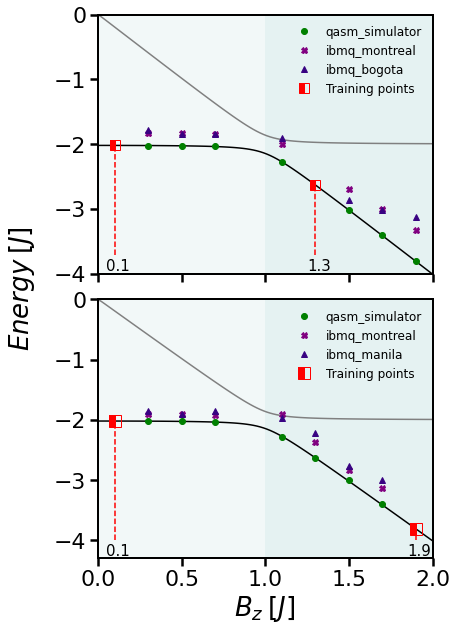

In [21]:
plotLCUfigure()

In [22]:
# Lets plot EVC plot
J = -1
N = 2
Bzmax = 2
Bzmin = 0.0
Bx=0.1
Bzlist_training13=[0.1,1.3]

filename_evc_exact = "Exact_BzvsE_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"

filenameed_evc_13="ed_BzvsE_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+"moretargets=True"+".dat"
filenameibmqsim_evc_13="ibmqsim_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+"moretargets=True"+".dat"
filenamebogota_evc_13="bogota_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+"moretargets=True"+".dat"
filenamemanila_evc_13="manila_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+"moretargets=True"+".dat"
# filenamemontreal_evc_13="montreal_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
#                 "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training13)+".dat"
filenametrain_evc_13="training"+str(Bzlist_training13)+"BzvsE_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"

Bzlist_training19=[0.1,1.9]

filenameed_evc_19="ed_BzvsE_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+"moretargets=True"+".dat"
filenameibmqsim_evc_19="ibmqsim_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+"moretargets=True"+".dat"
filenamemanila_evc_19="manila_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+"moretargets=True"+".dat"
# filenamemanila_evc_19="manila_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
#                 "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+".dat"
filenamemontreal_evc_19="montreal_BzvsEm_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+"_Bzlist_training="+str(Bzlist_training19)+"moretargets=True"+".dat"
filenametrain_evc_19="training"+str(Bzlist_training19)+"BzvsE_EVCN_"+str(N)+"siteXY_J="+str(J)+"_Bzmax="+str(Bzmax)+\
                "_Bzmin="+str(Bzmin)+"Bx="+str(Bx)+".dat"


In [23]:
# def plotEVCfigure(N=2):

#     Bzlist,eval_stor = read_plotdata_lcu_exactenergy(filename = filename_evc_exact,ncol=5)
#     Bzlist_ed13,eval_ed13 = read_plotdata_lcu_ed(filename = filenameed_evc_13,ncol=3)
#     Bzlist_ibmqsim13,eval_ibmqsim13,eval2_ibmqsim13 = read_plotdata_lcu_mach(filename = filenameibmqsim_evc_13,ncol=3)
#     Bzlist_bogota13,eval_bogota13,eval2_bogota13 = read_plotdata_lcu_mach(filename = filenamebogota_evc_13,ncol=3)
#     # Bzlist_montreal13,eval_montreal13,mag_montreal13 = read_plotdata_lcu_mach(filename = filenamemontreal_evc_13,ncol=3)
#     Bzlist_manila13,eval_manila13,eval2_manila13 = read_plotdata_lcu_mach(filename = filenamemanila_evc_13,ncol=3)
#     Bzlist_tr13,eval_tr13 = read_plotdata_lcu_train(filename=filenametrain_evc_13,ncol=2)
    
#     Bzlist_ed19,eval_ed19 = read_plotdata_lcu_ed(filename = filenameed_evc_19,ncol=3)
#     Bzlist_ibmqsim19,eval_ibmqsim19,eval2_ibmqsim19 = read_plotdata_lcu_mach(filename = filenameibmqsim_evc_19,ncol=3)
#     # # Bzlist_bogota19,eval_bogota19,mag_bogota19 = read_plotdata_lcu_mach(filename = filenamebogota_19,ncol=3)
#     Bzlist_montreal19,eval_montreal19,eval2_montreal19 = read_plotdata_lcu_mach(filename = filenamemontreal_evc_19,ncol=3)
#     Bzlist_manila19,eval_manila19,eval2_manila19 = read_plotdata_lcu_mach(filename = filenamemanila_evc_19,ncol=3)
#     Bzlist_tr19,eval_tr19 = read_plotdata_lcu_train(filename=filenametrain_evc_19,ncol=2)
    
#     clrlst = ["k","grey","grey","grey"]
#     fig,ax = plt.subplots(figsize=(8,6*2),nrows =2,sharex=False)
#     ax[0].set_ylim(-4,0)
#     ax[1].set_ylim(-4,0)
#     ax[0].axvspan(0, 1, facecolor='#FFFFF0')
#     ax[0].axvspan(1, 2, facecolor='#F5F5DC')
#     ax[1].axvspan(0, 1, facecolor='#FFFFF0')
#     ax[1].axvspan(1, 2, facecolor='#F5F5DC')
#     for j in range(2**N):
#         ax[0].plot(Bzlist,eval_stor[:,j],color=clrlst[j]) 
#         ax[1].plot(Bzlist,eval_stor[:,j],color=clrlst[j]) 
#     # for j in range(2):
#         # ax.plot(Bzlist_ed,eval_ed[:,j],'*',color='r') 
#     # clrs=["#800000", ]
#     ax[0].plot(Bzlist_ibmqsim13,eval_ibmqsim13,'o',color = "g",label="simulator")
#     ax[0].plot(Bzlist_ibmqsim13,eval2_ibmqsim13,'o',color = "g")
    
#     ax[0].plot(Bzlist_manila13,eval_manila13,'X',color = "#800080",label="manila")
#     ax[0].plot(Bzlist_manila13,eval2_manila13,'X',color = "#800080")
    
#     ax[0].plot(Bzlist_bogota13,eval_bogota13,'^',color = "#380282",label="bogota") 
#     ax[0].plot(Bzlist_bogota13,eval2_bogota13,'^',color = "#380282")
#     ax[0].plot(Bzlist_tr13,eval_tr13,'s',color = "r",fillstyle = "left",markersize = 10,label = "training points")
#     # ax.plot(Bzlist_manila,eval_manila,'s',color = "g",)
#     ax[0].legend(loc=1,fontsize=12)
#     ymin13, ymax13 = ax[0].get_ybound()
#     ax[0].axvline(Bzlist_tr13[0],ymax = (eval_tr13[0]-ymin13)/(ymax13-ymin13),ls="--",color="r")
#     ax[0].axvline(Bzlist_tr13[1],ymax = (eval_tr13[1]-ymin13)/(ymax13-ymin13),ls="--",color="r")
#     ax[0].set_xticks([0.1,1.0,1.3,])
    
#     # ax[0].plot(Bzlist_tr13,eval_tr13,'2',color = "r",markersize = 10,label = "training points")
#     # ax[0].plot(Bzlist_tr13,eval_tr13,'o',color = "r",markersize = 10,fillstyle="left")
#     # ax.plot(Bzlist_manila,eval_manila,'s',color = "g",)
#     # ax[0].legend(loc=1,fontsize=12)
#     # ax[0].set_xlim(0,2)
#     # ax[0].set_xlabel(r"$B_z$")
#     # ax[0].set_ylabel(r"$Energy$")
    
#     ax[1].plot(Bzlist_ibmqsim19,eval_ibmqsim19,'o',color = "g",label="simulator")
#     ax[1].plot(Bzlist_ibmqsim19,eval2_ibmqsim19,'o',color = "g")
    
#     # ax[1].plot(Bzlist_bogota19,eval_bogota19,'s',color = "b",label="bogota")
#     ax[1].plot(Bzlist_montreal19,eval_montreal19,'X',color = "#800080",label="montreal")
#     ax[1].plot(Bzlist_montreal19,eval2_montreal19,'X',color = "#800080")
    
#     ax[1].plot(Bzlist_manila19,eval_manila19,'^',color = "#380282",label="manila")
#     ax[1].plot(Bzlist_manila19,eval2_manila19,'^',color = "#380282")
    
#     ax[1].plot(Bzlist_tr19,eval_tr19,'s',color = "r",markersize = 10,fillstyle="left",label = "training points")
#     # ax[1].axvline(Bzlist_tr19[0],ls="--")
#     ymin19, ymax19 = ax[1].get_ybound()
#     ax[1].axvline(Bzlist_tr19[0],ymax = (eval_tr19[0]-ymin19)/(ymax19-ymin19),ls="--",color="r")
#     ax[1].axvline(Bzlist_tr19[1],ymax = (eval_tr19[1]-ymin19)/(ymax19-ymin19),ls="--",color="r")
#     ax[1].legend(loc=1,fontsize=12)
#     ax[1].set_xticks([0.1,1.0,1.9,])
    
#     ax[1].legend(loc=1,fontsize=12)
#     ax[1].set_xlabel(r"$B_z \: [J]$")
#     fig.text(-0.05, 0.5, r"$Energy \: [J]$", va='center', ha='center', rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
    
   
#     tag = "v3_evc_2site_Bztraining"+str(Bzlist_tr13)+str(Bzlist_tr19)
#     fignamepdf = "paper_figures/paper_plots/" + tag + ".pdf"
#     # fig.savefig(fignamepdf,bbox_inches='tight')
#     fignamepng = "paper_figures/paper_plots/" + tag + ".png"
#     # fig.savefig(fignamepng,bbox_inches='tight')
    

In [31]:
def plotEVCfigure(N=2):

    Bzlist,eval_stor = read_plotdata_lcu_exactenergy(filename = filename_evc_exact,ncol=5)
    Bzlist_ed13,eval_ed13 = read_plotdata_lcu_ed(filename = filenameed_evc_13,ncol=3)
    Bzlist_ibmqsim13,eval_ibmqsim13,eval2_ibmqsim13 = read_plotdata_lcu_mach(filename = filenameibmqsim_evc_13,ncol=3)
    Bzlist_bogota13,eval_bogota13,eval2_bogota13 = read_plotdata_lcu_mach(filename = filenamebogota_evc_13,ncol=3)
    # Bzlist_montreal13,eval_montreal13,mag_montreal13 = read_plotdata_lcu_mach(filename = filenamemontreal_evc_13,ncol=3)
    Bzlist_manila13,eval_manila13,eval2_manila13 = read_plotdata_lcu_mach(filename = filenamemanila_evc_13,ncol=3)
    Bzlist_tr13,eval_tr13 = read_plotdata_lcu_train(filename=filenametrain_evc_13,ncol=2)
    
    Bzlist_ed19,eval_ed19 = read_plotdata_lcu_ed(filename = filenameed_evc_19,ncol=3)
    Bzlist_ibmqsim19,eval_ibmqsim19,eval2_ibmqsim19 = read_plotdata_lcu_mach(filename = filenameibmqsim_evc_19,ncol=3)
    # # Bzlist_bogota19,eval_bogota19,mag_bogota19 = read_plotdata_lcu_mach(filename = filenamebogota_19,ncol=3)
    Bzlist_montreal19,eval_montreal19,eval2_montreal19 = read_plotdata_lcu_mach(filename = filenamemontreal_evc_19,ncol=3)
    Bzlist_manila19,eval_manila19,eval2_manila19 = read_plotdata_lcu_mach(filename = filenamemanila_evc_19,ncol=3)
    Bzlist_tr19,eval_tr19 = read_plotdata_lcu_train(filename=filenametrain_evc_19,ncol=2)
    
    clrlst = ["k","grey","grey","grey"]
    fig,ax = plt.subplots(figsize=(6,5*2),nrows =2,sharex=True)
    ax[0].set_ylim(-4,0)
    ax[1].set_ylim(-4.3,0)
    
    col1=(0.0,0.5,0.5,0.05)
    col2=(0.0,0.5,0.5,0.1)
    
    for ix in ax:
        ix.axvspan(0, 1, facecolor=col1)
        ix.axvspan(1, 2, facecolor=col2)

    for j in range(2**N):
        ax[0].plot(Bzlist,eval_stor[:,j],color=clrlst[j]) 
        ax[1].plot(Bzlist,eval_stor[:,j],color=clrlst[j]) 
    # for j in range(2):
        # ax.plot(Bzlist_ed,eval_ed[:,j],'*',color='r') 
    # clrs=["#800000", ]
    
    ax[0].plot(Bzlist_ibmqsim13,eval_ibmqsim13,'-',color = "k",label="qasm_simulator")
    ax[0].plot(Bzlist_ibmqsim13,eval2_ibmqsim13,'-',color = "k")
    
    ax[0].plot(Bzlist_manila13,eval_manila13,'--',color = "#800080",label="ibmq_manila")
    ax[0].plot(Bzlist_manila13,eval2_manila13,'--',color = "#800080")
    
    ax[0].plot(Bzlist_bogota13,eval_bogota13,'-.',color = "#380282",label="ibmq_bogota") 
    ax[0].plot(Bzlist_bogota13,eval2_bogota13,'-.',color = "#380282")
    # ax.plot(Bzlist_manila,eval_manila,'s',color = "g",)
    ax[0].plot(Bzlist_tr13,eval_tr13,'s',zorder=10,
               color = "r",fillstyle = "left",markersize = 10,label = "Training points")
    l=ax[0].legend(loc=1,fontsize=12)
    l.get_frame().set_alpha(0)
    ymin13, ymax13 = ax[0].get_ybound()
    ax[0].axvline(Bzlist_tr13[0],ymax = (eval_tr13[0]-ymin13)/(ymax13-ymin13),ymin=0.07,ls="--",color="r")
    ax[0].axvline(Bzlist_tr13[1],ymax = (eval_tr13[1]-ymin13)/(ymax13-ymin13),ymin=0.07,ls="--",color="r")
    # ax[0].set_xticks([0.1,1.0,1.3,])
    ax[0].text(0.05,-3.95,"0.1",fontsize='15')
    ax[0].text(1.25,-3.95,"1.3",fontsize='15')
    # ax[0].plot(Bzlist_tr13,eval_tr13,'2',color = "r",markersize = 10,label = "training points")
    # ax[0].plot(Bzlist_tr13,eval_tr13,'o',color = "r",markersize = 10,fillstyle="left")
    # ax.plot(Bzlist_manila,eval_manila,'s',color = "g",)
    # ax[0].legend(loc=1,fontsize=12)
    # ax[0].set_xlim(0,2)
    # ax[0].set_xlabel(r"$B_z$")
    # ax[0].set_ylabel(r"$Energy$")

    
    
    ax[1].plot(Bzlist_ibmqsim19,eval_ibmqsim19,'-',color = "k",label="qasm_simulator")
    ax[1].plot(Bzlist_ibmqsim19,eval2_ibmqsim19,'-',color = "k")
    
    # ax[1].plot(Bzlist_bogota19,eval_bogota19,'s',color = "b",label="bogota")
    ax[1].plot(Bzlist_montreal19,eval_montreal19,'--',color = "#800080",label="ibmq_montreal")
    ax[1].plot(Bzlist_montreal19,eval2_montreal19,'--',color = "#800080")
    
    ax[1].plot(Bzlist_manila19,eval_manila19,'-.',color = "#380282",label="ibmq_manila")
    ax[1].plot(Bzlist_manila19,eval2_manila19,'-.',color = "#380282")
    ax[1].plot(Bzlist_tr19,eval_tr19,'s',zorder=10,
               color = "r",markersize = 10,fillstyle="left",label = "Training points")
    # ax[1].axvline(Bzlist_tr19[0],ls="--")
    ymin19, ymax19 = ax[1].get_ybound()
    # ax[1].axvline(Bzlist_tr19[0],ymax = (eval_tr19[0]-ymin19)/(ymax19-ymin19),ymin=0.05,ls="--",color="r")
    # ax[1].axvline(Bzlist_tr19[1],ymax = (eval_tr19[1]-ymin19)/(ymax19-ymin19),ymin=0.05,ls="--",color="r")
    ax[1].axvline(Bzlist_tr19[0],ymax = (eval_tr19[0]-ymin19)/(ymax19-ymin19),ymin=0.07,ls="--",color="r")
    ax[1].axvline(Bzlist_tr19[1],ymax = (eval_tr19[1]-ymin19)/(ymax19-ymin19),ymin=0.07,ls="--",color="r")
    #ax[1].legend(loc=1,fontsize=12)
    # ax[1].set_xticks([0.1,1.0,1.9,])
    
    l=ax[1].legend(loc=1,fontsize=12)
    l.get_frame().set_alpha(0)
    
    ax[1].text(0.05,-4.25,"0.1",fontsize='15')
    ax[1].text(1.85,-4.25,"1.9",fontsize='15')

    ax[1].set_xlabel(r"$B_z \: [J]$")
    fig.text(-0.05, 0.5, r"$Energy \: [J]$", va='center', ha='center', rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
    # xshift = 0.1
    # ax[1].text(0.1+xshift,-3.9, r"$0.1$", va='center', ha='center',  fontsize=15)
    fig.subplots_adjust(wspace=0.0,hspace=0.1)
    tag = "v5_evc_2site_Bztraining"+str(Bzlist_tr13)+str(Bzlist_tr19)
    fignamepdf = "paper_figures/paper_plots/" + tag + ".pdf"
    fig.savefig(fignamepdf,bbox_inches='tight')
    fignamepng = "paper_figures/paper_plots/" + tag + ".png"
    fig.savefig(fignamepng,bbox_inches='tight')
    # ax[0].annotate(r'$\frac{|\uparrow\downarrow \rangle + |\uparrow\downarrow\rangle}{\sqrt{2}}$',(0.06,-2.45),fontsize='14')
    # ax[0].text(0.3,-0.3,r'$|\downarrow\downarrow\rangle$',fontsize='10')
    # ax[0,1].text(0.06,-2.45,r'$\frac{1}{\sqrt{2}}(|\uparrow\downarrow \rangle + |\uparrow\downarrow\rangle)$',fontsize='10')
    # ax[0,1].text(0.3,-0.3,r'$|\downarrow\downarrow\rangle$',fontsize='10')

/home/akhil/anaconda3/envs/eig_cont/lib/python3.7/site-packages/ipykernel_launcher.py:96: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


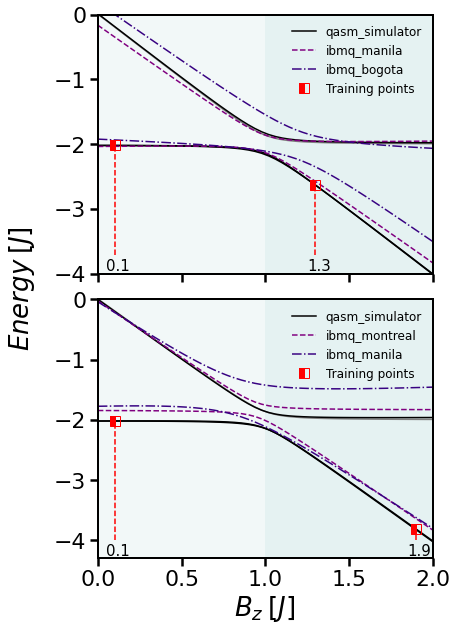

In [32]:
plotEVCfigure(N=2)

In [96]:
distzmin = 0.08
distzmax = 2.0
# distzmax = 3.0

distlist_training13=[0.1,1.6]
# distlist_target = [ 0.735]

npointsexact = 200
# npointsexact = 400
distzmintarget=0.09
distmaxtarget=2.9
npointstarget = 50
# npointstarget = 200
distlist_target = np.linspace(distzmintarget,distmaxtarget,npointstarget)

filename_h2totexact = "hydrogen_Exact_distvstotE_dist"+str(distzmin)+"to"+str(distzmax)+"_npoints="+str(npointsexact)+".dat"
filename_h2elecexact = "hydrogen_Exact_distvselecE_dist"+str(distzmin)+"to"+str(distzmax)+"_npoints="+str(npointsexact)+".dat"

filename_h2toted_16 = "hydrogen_ed_distvstotE_disttraining="+str(distlist_training13)+"lentarget="+str(len(distlist_target)) +".dat"
filename_h2eleced_16 = "hydrogen_ed_distvselecE_disttraining="+str(distlist_training13)+"lentarget="+str(len(distlist_target)) +".dat"

filename_h2train_16 = "hydrogen_training"+str(distlist_training13)+".dat"

distlist_training13=[1.6,1.7]
# filename_h2totexact = "hydrogen_Exact_distvstotE_dist"+str(distzmin)+"to"+str(distzmax)+"_npoints="+str(npointsexact)+".dat"
# filename_h2elecexact = "hydrogen_Exact_distvselecE_dist"+str(distzmin)+"to"+str(distzmax)+"_npoints="+str(npointsexact)+".dat"

filename_h2toted_67 = "hydrogen_ed_distvstotE_disttraining="+str(distlist_training13)+"lentarget="+str(len(distlist_target)) +".dat"
filename_h2eleced_67 = "hydrogen_ed_distvselecE_disttraining="+str(distlist_training13)+"lentarget="+str(len(distlist_target)) +".dat"

filename_h2train_67 = "hydrogen_training"+str(distlist_training13)+".dat"

In [115]:
def plothydrogenfigure():

    distlist,eval_stor = read_plotdata_lcu_exactenergy(filename = filename_h2totexact,ncol=5)
   
    distlist_ed16,eval_ed16,eval2_ed16 = read_plotdata_lcu_mach(filename = filename_h2toted_16,ncol=3)
   
    distlist_tr16,eval_elec_tr16,eval_tot_tr16  = read_plotdata_lcu_mach(filename = filename_h2train_16,ncol=3)
    
    distlist_ed67,eval_ed67,eval2_ed67 = read_plotdata_lcu_mach(filename = filename_h2toted_67,ncol=3)
   
    distlist_tr67,eval_elec_tr67,eval_tot_tr67  = read_plotdata_lcu_mach(filename = filename_h2train_67,ncol=3)
        
        
    clrlst = ["k","grey","grey","grey"]
    
    fig,ax = plt.subplots(figsize=(6,3*2),nrows =2,sharex=True)
    # ax[0].set_ylim(-1.5,4)
    # ax[1].set_ylim(-1.5,4)
    for ix in ax:
        ix.set_ylim(-2.5,4)
        ix.set_xlim(0.0,2)
    # ax[0].set_ylim(-1.5,1)
    # ax[1].set_ylim(-1.5,1)
    # ax[0].axvspan(0, 1, facecolor='#FFFFF0')
    # ax[0].axvspan(1, 2, facecolor='#F5F5DC')
    # ax[1].axvspan(0, 1, facecolor='#FFFFF0')
    # ax[1].axvspan(1, 2, facecolor='#F5F5DC')
    for j in range(2**2):
        ax[0].plot(distlist,eval_stor[:,j],color=clrlst[j]) 
        # ax[1].plot(distlist,eval_stor[:,j],color=clrlst[j]) 
    
    # clrs=["#800000", ]
    ax[0].plot(distlist_ed16,eval_ed16,'o-',color = "b",markersize = 4,label="EC")
    ax[0].plot(distlist_ed16,eval2_ed16,'o-',color = "g",markersize = 4,label="EC")
    
#     ax[0].plot(distlist_manila16,eval_manila16,'X',color = "#800080",label="manila")
#     ax[0].plot(distlist_manila16,eval2_manila16,'X',color = "#800080")
    
#     ax[0].plot(distlist_bogota16,eval_bogota16,'^',color = "#380282",label="bogota") 
#     ax[0].plot(distlist_bogota16,eval2_bogota16,'^',color = "#380282")
    ax[0].plot(distlist_tr16,eval_tot_tr16,'s',color = "r",fillstyle = "left",markersize = 10,label = "Training points")

    ax[0].legend(loc=1,fontsize=12)
    ymin16, ymax16 = ax[0].get_ybound()
    ax[0].axvline(distlist_tr16[0],ymax = (eval_tot_tr16[0]-ymin16)/(ymax16-ymin16),ymin=0.1,ls="--",color="r")
    ax[0].axvline(distlist_tr16[1],ymax = (eval_tot_tr16[1]-ymin16)/(ymax16-ymin16),ymin=0.1,ls="--",color="r")
    # ax[0].set_xticks([0.1,1.6])#,fontsize=15)
    ax[0].text(0.0,-2.25,"0.1",fontsize='15')
    ax[0].text(1.5,-2.25,"1.6",fontsize='15')
    
    for j in range(2**2):
        ax[1].plot(distlist,eval_stor[:,j],color=clrlst[j]) 
        
    
   
    ax[1].plot(distlist_ed67,eval_ed67,'o-',color = "b",markersize = 4,label="EC")
    ax[1].plot(distlist_ed67,eval2_ed67,'o-',color = "g",markersize = 4,label="EC")

    ax[1].plot(distlist_tr67,eval_tot_tr67,'s',color = "r",fillstyle = "left",markersize = 10,label = "Training points")

    ax[1].legend(loc=1,fontsize=12)
    
    ymin67, ymax67 = ax[1].get_ybound()
    ax[1].axvline(distlist_tr67[0],ymax = (eval_tot_tr67[0]-ymin67)/(ymax67-ymin67),ymin=0.1,ls="--",color="r")
    ax[1].axvline(distlist_tr67[1],ymax = (eval_tot_tr67[1]-ymin67)/(ymax67-ymin67),ymin=0.1,ls="--",color="r")
    # ax[1].set_xticks([1.6,1.7])#,fontsize = 5)
    # ax[1].set_xticklabels(["1.6","1.7"])
   
    plt.rcParams['xtick.labelsize'] = 15
    # plt.rcParams['ytick.labelsize'] = 22
    # ax[1].labelsize = 10
    
    ax[1].text(1.5,-2.25,"1.6",fontsize='15')
    ax[1].text(1.65,-2.25,"1.7",fontsize='15')
#     ax[1].legend(loc=1,fontsize=12)
    ax[1].set_xlabel(r"$Distance\: (R)$")
    fig.text(-0.05, 0.55, r"$ Energy $", va='center', ha='center', rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
    
    
   
    tag = "v3_hydrogen_disttraining"+str(distlist_tr16)+str(distlist_tr67)
    fignamepdf = "paper_figures/paper_plots/" + tag + ".pdf"
    fig.savefig(fignamepdf,bbox_inches='tight')
    fignamepng = "paper_figures/paper_plots/" + tag + ".png"
    fig.savefig(fignamepng,bbox_inches='tight')
    

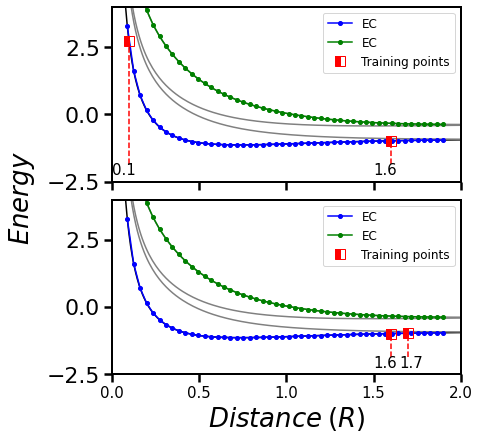

In [116]:
plothydrogenfigure()

In [11]:
filename_XXZexact = "XXZ_Exact_energy[0.2, 0.4, 1.2]_npoints=100.dat"
filename_XXZed = "XXZ_ed_energy=[0.2, 0.4, 1.2]lentarget=30.dat"
filename_XXZtr  ="XXZ_training[0.2, 0.4, 1.2].dat"

In [14]:
def plotXXZfigure(N=4):

    Jzlist,eval_stor = read_plotdata_lcu_exactenergy(filename = filename_XXZexact,ncol=1+(2**N))
   
    Jzlist_ed,eval_stored = read_plotdata_lcu_exactenergy(filename = filename_XXZed,ncol=4)
   
    Jzlist_tr, Elisttr = read_plotdata_lcu_train(filename=filename_XXZtr,ncol=2)
    clrlst = ["k","grey","grey","grey"]
    
    fig,ax = plt.subplots(figsize=(6,4),nrows =1,sharex=False)
    ax.set_ylim(-11,14)
    # print(N,len(eval_stor[0]))
    for j in range(2**N):
        ax.plot(Jzlist,eval_stor[:,j],color="grey")    
    for j in range(3): 
        if(j==0):
            ax.plot(Jzlist_ed,eval_stored[:,j],'o-',color = "b",markersize = 4,label="EC")
        else:
            ax.plot(Jzlist_ed,eval_stored[:,j],'o-',color = "b",markersize = 4,)
    ax.plot(Jzlist_tr,Elisttr,'s',color = "r",fillstyle = "left",markersize = 10,label = "Training points")
    
    ymin, ymax = ax.get_ybound()
    for j in range(3):
        ax.axvline(Jzlist_tr[j],ymax = (Elisttr[j]-ymin)/(ymax-ymin),ymin=0.09,ls="--",color="r")
    ax.set_xlabel(r"$J_z$")
    ax.legend(loc=5,fontsize=12)
    # ax.axvline(distlist_tr16[0],ymax = (eval_tot_tr16[0]-ymin16)/(ymax16-ymin16),ls="--",color="r")
    # ax.axvline(distlist_tr16[1],ymax = (eval_tot_tr16[1]-ymin16)/(ymax16-ymin16),ls="--",color="r")
    # ax.set_xticks([0.1,1.6],fontsize=15)
    ax.text(0.1,-10.5,"0.2",fontsize='15')
    ax.text(0.3,-10.5,"0.4",fontsize='15')
    ax.text(1.1,-10.5,"1.2",fontsize='15')
    fig.text(-0.05, 0.5, r"$ Energy[J] $", va='center', ha='center', rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
    
    # ax.axvspan(0.0, 1, facecolor=(0.5,0.2,0.15,0.05))
    # ax.axvspan(1, 2.0, facecolor=(0.5,0.2,0.15,0.1))
    
    col1=(0.0,0.5,0.5,0.05)
    col2=(0.0,0.5,0.5,0.1)
    ax.axvspan(0, 1, facecolor=col1)
    ax.axvspan(1, 2, facecolor=col2)
    l=ax.legend(loc=2,fontsize=12)
    l.get_frame().set_alpha(0)
    
    tag = "XXZ_v1"
    fignamepdf = "paper_figures/paper_plots/" + tag + ".pdf"
    fig.savefig(fignamepdf,bbox_inches='tight')
    fignamepng = "paper_figures/paper_plots/" + tag + ".png"
    fig.savefig(fignamepng,bbox_inches='tight')
    

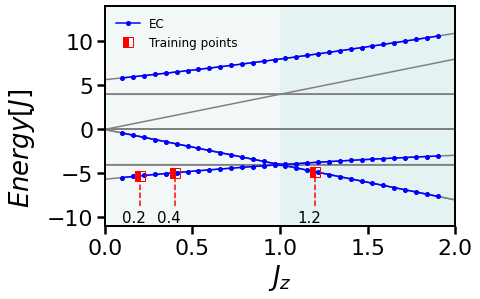

In [15]:
plotXXZfigure(N=4)